In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
!pip install opencv-python

In [3]:
import cv2
import glob

X = []
Y = []
classes = {'NORMAL': 0, 'PNEUMONIA': 1}
train_dir = 'D://downloadss//chest_xray//train//'

for cls, label in classes.items():
    pth = train_dir + cls + '//*'
    for file in glob.glob(pth):
        img = cv2.imread(file, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(label)

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

1    3875
0    1341
dtype: int64

In [7]:
X.shape

(5216, 200, 200)

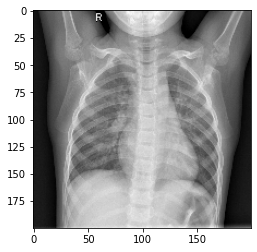

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(5216, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((4172, 40000), (1044, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

(4172, 40000) (1044, 40000)


In [15]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [16]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [17]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9918504314477469
Testing Score: 0.9818007662835249


In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pca_train, ytrain)

print("Training Score:", knn.score(pca_train, ytrain))
print("Testing Score:", knn.score(pca_test, ytest))

Training Score: 0.9530201342281879
Testing Score: 0.9386973180076629


In [19]:
dt = DecisionTreeClassifier()
dt.fit(pca_train, ytrain)

print("Training Score:", dt.score(pca_train, ytrain))
print("Testing Score:", dt.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.8850574712643678


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

In [30]:
X = X.reshape(len(X), 200, 200, 1)
X.shape
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,
                                               test_size=.20)
xtrain.shape, xtest.shape
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
print(ytrain.shape)
ytrain = to_categorical(ytrain, 2)
ytest = to_categorical(ytest, 2)
print(ytrain.shape)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=10, batch_size=32)

print("Training Score:", model.evaluate(xtrain, ytrain)[1])
print("Testing Score:", model.evaluate(xtest, ytest)[1])

255 0
255 0
1.0 0.0
1.0 0.0
(4172,)
(4172, 2)
Epoch 1/10
131/131 [==============================] - 69s 521ms/step - loss: 0.4060 - accuracy: 0.8713
Epoch 2/10
131/131 [==============================] - 77s 585ms/step - loss: 0.1009 - accuracy: 0.9621
Epoch 3/10
131/131 [==============================] - 81s 618ms/step - loss: 0.0724 - accuracy: 0.9756
Epoch 4/10
131/131 [==============================] - 78s 594ms/step - loss: 0.0670 - accuracy: 0.9744
Epoch 5/10
131/131 [==============================] - 78s 592ms/step - loss: 0.0444 - accuracy: 0.9832
Epoch 6/10
131/131 [==============================] - 81s 606ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 7/10
131/131 [==============================] - 81s 618ms/step - loss: 0.0126 - accuracy: 0.9962
Epoch 8/10
131/131 [==============================] - 83s 636ms/step - loss: 0.0111 - accuracy: 0.9957
Epoch 9/10
131/131 [==============================] - 85s 652ms/step - loss: 0.0032 - accuracy: 0.9998
Epoch 10/10
131/131 [======

In [28]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
classes = {'NORMAL': 0, 'PNEUMONIA': 1}
train_dir = 'D://downloadss//chest_xray//chest_xray//train//'
test_dir = 'D://downloadss//chest_xray//chest_xray//test//'
X_train = []
y_train = []
for cls, label in classes.items():
    path = train_dir + cls + '//*'
    for file in glob.glob(path):
        img = cv2.imread(file, 0)
        img = cv2.resize(img, (200, 200))
        X_train.append(img)
        y_train.append(label)
X_test = []
y_test = []
for cls, label in classes.items():
    path = test_dir + cls + '//*'
    for file in glob.glob(path):
        img = cv2.imread(file, 0)
        img = cv2.resize(img, (200, 200))
        X_test.append(img)
        y_test.append(label)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 40000)).reshape(-1, 200, 200)
X_test = scaler.transform(X_test.reshape(-1, 40000)).reshape(-1, 200, 200)
model = Sequential()
model.add(LSTM(units=64, input_shape=(200, 200), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
131/131 [==============================] - 28s 171ms/step - loss: 0.5674 - accuracy: 0.7054 - val_loss: 0.2334 - val_accuracy: 0.8812
Epoch 2/10
131/131 [==============================] - 21s 161ms/step - loss: 0.4841 - accuracy: 0.7632 - val_loss: 0.4577 - val_accuracy: 0.6791
Epoch 3/10
131/131 [==============================] - 21s 160ms/step - loss: 0.4776 - accuracy: 0.7673 - val_loss: 0.1490 - val_accuracy: 0.9684
Epoch 4/10
131/131 [==============================] - 21s 161ms/step - loss: 0.4402 - accuracy: 0.7919 - val_loss: 0.2784 - val_accuracy: 0.8659
Epoch 5/10
131/131 [==============================] - 21s 162ms/step - loss: 0.4324 - accuracy: 0.8097 - val_loss: 0.2180 - val_accuracy: 0.9100
Epoch 6/10
131/131 [==============================] - 21s 160ms/step - loss: 0.4081 - accuracy: 0.8181 - val_loss: 0.2266 - val_accuracy: 0.8851
Epoch 7/10
131/131 [==============================] - 21s 160ms/step - loss: 0.4011 - accuracy: 0.8221 - val_loss: 0.1953 - val_ac